In [3]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [ ]:
# Preparing to analyze automobile fuel

In [4]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head

/Users/tlking/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method DataFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     1

In [6]:
column_names = vehicles.columns.values
column_names[[22, 23, 70, 71, 72, 73]]

array(['cylinders', 'displ', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode'], dtype=object)

In [ ]:
# Exploring and describing fuel efficiency data with Python

In [7]:
len(vehicles)

38108

In [8]:
len(vehicles.columns)

83

In [9]:
print(vehicles.columns)

Index([u'barrels08', u'barrelsA08', u'charge120', u'charge240', u'city08',
       u'city08U', u'cityA08', u'cityA08U', u'cityCD', u'cityE', u'cityUF',
       u'co2', u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08',
       u'comb08U', u'combA08', u'combA08U', u'combE', u'combinedCD',
       u'combinedUF', u'cylinders', u'displ', u'drive', u'engId', u'eng_dscr',
       u'feScore', u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1',
       u'ghgScore', u'ghgScoreA', u'highway08', u'highway08U', u'highwayA08',
       u'highwayA08U', u'highwayCD', u'highwayE', u'highwayUF', u'hlv', u'hpv',
       u'id', u'lv2', u'lv4', u'make', u'model', u'mpgData', u'phevBlended',
       u'pv2', u'pv4', u'range', u'rangeCity', u'rangeCityA', u'rangeHwy',
       u'rangeHwyA', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'VClass', u'year', u'youSaveSpend', u'guzzler', u'trans_dscr',
       u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor', u

In [10]:
len(pd.unique(vehicles.year))

34

In [11]:
min(vehicles.year)

1984

In [12]:
max(vehicles["year"])

2017

In [13]:
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     26526
Premium Gasoline     10298
Diesel                1014
Electricity            133
Midgrade Gasoline       77
Natural Gas             60
Name: fuelType1, dtype: int64

In [15]:
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11042
Manual 5-spd                         8319
Automatic 3-spd                      3151
Automatic (S6)                       2684
Manual 6-spd                         2448
Automatic 5-spd                      2191
Manual 4-spd                         1483
Automatic 6-spd                      1447
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      702
Automatic 7-spd                       675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-spd                       259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Automatic (A1)                        124
Auto(AM6)                             120
Automatic 9-spd                       104
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-spd                      

In [16]:
vehicles["trany2"] = vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)

A    25676
M    12421
Name: trany2, dtype: int64

In [ ]:
# Analyzing automobile fuel efficiency over time with Python

In [17]:
grouped = vehicles.groupby("year")

In [18]:
averaged = grouped['comb08',  'highway08', 'city08'].agg([np.mean])

In [20]:
averaged.columns = ['comb08_mean','highway08_mean', 'city08_mean']
averaged['year'] = averaged.index

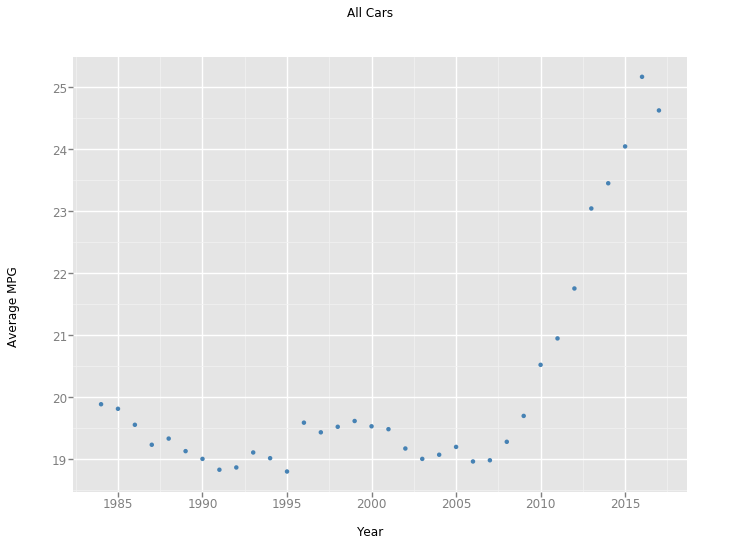

<ggplot: (287347153)>


In [28]:
print ggplot(averaged, aes('year', 'comb08_mean')) + geom_point(color='steelblue') + xlab("Year") + ylab("Average MPG") + ggtitle("All Cars")

In [29]:
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != "Hybrid"
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

34979

In [30]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.838219
2012  21.407328
2013  22.228877
2014  22.279835
2015  22.424555
2016  22.749766
2017  22.780488


In [31]:
pd.unique(vehicles_non_hybrid.displ)

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4,  0.9])

In [40]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid.loc[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid.loc[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

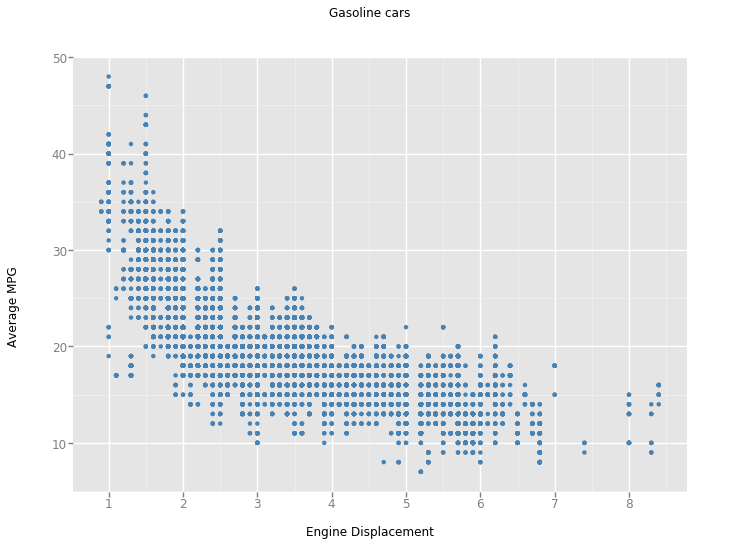

<ggplot: (288432685)>


In [41]:
print ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) + geom_point(color='steelblue') + xlab("Engine Displacement") + ylab("Average MPG") + ggtitle("Gasoline cars")

In [46]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].agg([np.mean])

In [47]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year, id_vars='year')

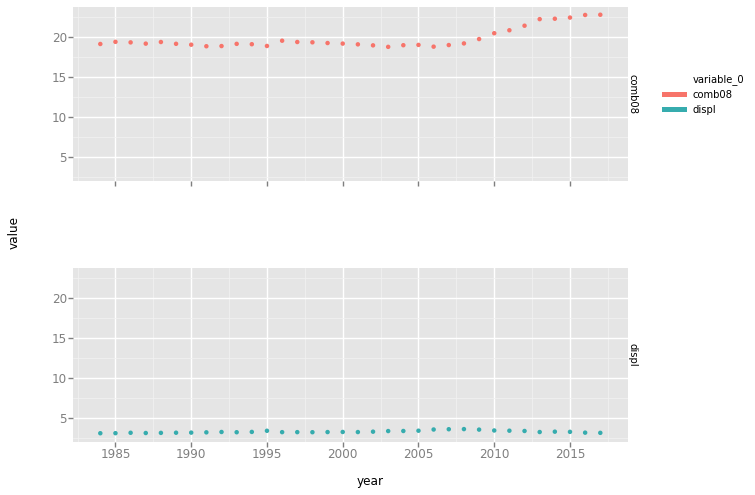

<ggplot: (298930385)>

In [59]:
p = ggplot(aes(x='year', y='value', color = 'variable_0'), data= melted_avg_grouped_by_year)
p + geom_point() + facet_grid("variable_0")

In [ ]:
# Investigating the makes and models of automobiles with Python

In [60]:
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [61]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [62]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

Axes(0.125,0.125;0.775x0.755)


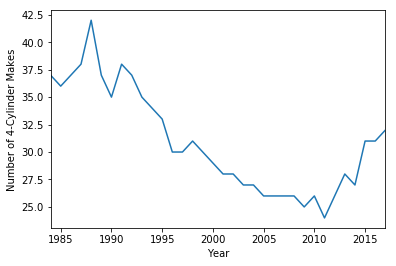

In [64]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print fig

In [67]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])
unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))    
unique_makes = reduce(set.intersection, unique_makes)
print unique_makes

set(['Dodge', 'Volkswagen', 'Jeep', 'Chevrolet', 'Nissan', 'Honda', 'Toyota', 'Ford', 'Mazda', 'Subaru', 'Chrysler', 'Mitsubishi'])


In [68]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)
df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [70]:
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

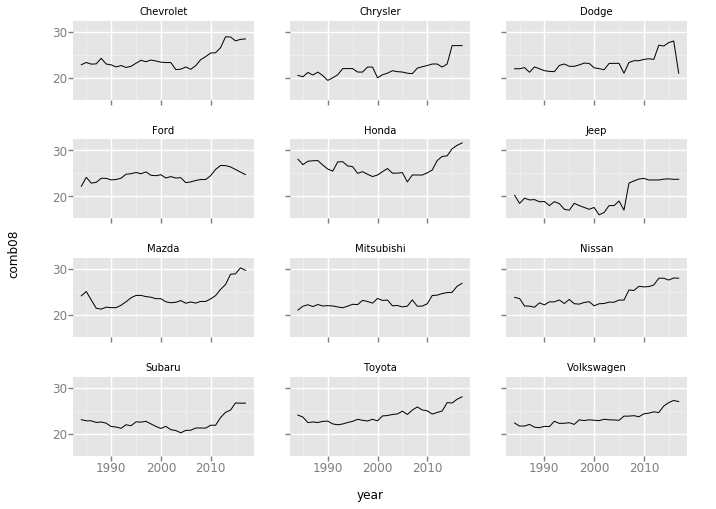

<ggplot: (299471293)>

In [71]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')